In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
from pandas import Series,DataFrame
from datetime import datetime

In [ ]:
import pandas_datareader.data as web

#Read the Data from Yahoo finance website directly.

In [ ]:
end=datetime.now()
end

datetime.datetime(2022, 6, 13, 8, 46, 41, 865559)

In [ ]:
end.year,end.month,end.day

(2022, 6, 13)

In [ ]:
company_list=['AAPL','MSFT','GOOG','AMZN']

In [ ]:
start_date=datetime(end.year-1,end.month,end.day)
start_date

datetime.datetime(2021, 6, 13, 0, 0)

In [ ]:
for i in company_list:
  if(i=='AAPL'):  
    appl_Data=web.DataReader(name=i,data_source='yahoo',start=start_date,end=end)
  elif(i=='MSFT'):
    msft_Data=web.DataReader(name=i,data_source='yahoo',start=start_date,end=end)
  elif(i=='GOOG'):
    goog_Data=web.DataReader(name=i,data_source='yahoo',start=start_date,end=end)
  else:
    amzn_Data=web.DataReader(name='AMZN',data_source='yahoo',start=start_date,end=end)

   


In [ ]:
amzn_Data.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-06,128.990005,123.809998,125.250000,124.790001,135269000.0,124.790001
2022-06-07,124.099998,120.629997,122.010002,123.000000,85156700.0,123.000000
2022-06-08,123.750000,120.750000,122.610001,121.180000,64926600.0,121.180000
2022-06-09,121.300003,116.099998,119.989998,116.150002,67029800.0,116.150002
2022-06-10,114.500000,109.050003,113.419998,109.650002,87266000.0,109.650002


In [ ]:
appl_Data['Company']='Apple'
msft_Data['Company']='Microsoft'
goog_Data['Company']='Google'
amzn_Data['Company']='Amazon'


In [ ]:
msft_Data.tail()

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2022-06-06,274.179993,267.220001,272.059998,268.750000,22400300.0,268.750000,Microsoft
2022-06-07,273.130005,265.940002,266.640015,272.500000,22860700.0,272.500000,Microsoft
2022-06-08,273.000000,269.609985,271.709991,270.410004,17372300.0,270.410004,Microsoft
2022-06-09,272.709991,264.630005,267.779999,264.790009,26439700.0,264.790009,Microsoft
2022-06-10,260.579987,252.529999,260.579987,252.990005,31422800.0,252.990005,Microsoft


In [ ]:
df=pd.concat([appl_Data,msft_Data,goog_Data,amzn_Data])
df.tail()

,High,Low,Open,Close,Volume,Adj Close,Company
Date,,,,,,,
2022-06-06,128.990005,123.809998,125.250000,124.790001,135269000.0,124.790001,Amazon
2022-06-07,124.099998,120.629997,122.010002,123.000000,85156700.0,123.000000,Amazon
2022-06-08,123.750000,120.750000,122.610001,121.180000,64926600.0,121.180000,Amazon
2022-06-09,121.300003,116.099998,119.989998,116.150002,67029800.0,116.150002,Amazon
2022-06-10,114.500000,109.050003,113.419998,109.650002,87266000.0,109.650002,Amazon


In [ ]:
df.to_csv('ShareMarketData.csv')

#Perform cleaning.

In [ ]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
Company      0
dtype: int64

#Visualize the change in a stock’s volume being traded, over time?
#What was the change in stock price over time?

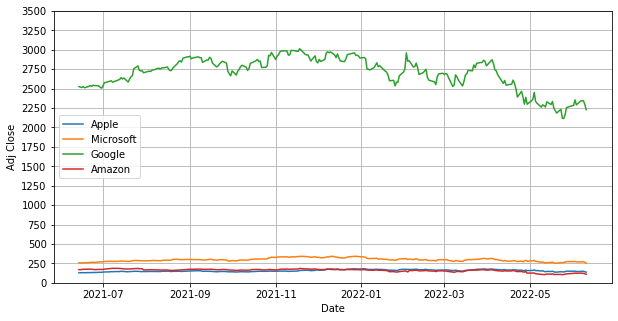

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(appl_Data['Adj Close'],label='Apple')
plt.plot(msft_Data['Adj Close'],label='Microsoft')
plt.plot(goog_Data['Adj Close'],label='Google')
plt.plot(amzn_Data['Adj Close'],label='Amazon')
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.grid(True)

plt.yticks([0,250,500,750,1000,1250,1500,1750,2000,2250,2500,2750,3000,3250,3500])
plt.legend(loc=6)
plt.ylim(0,3500)
plt.show()

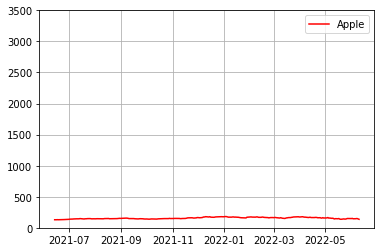

In [ ]:
plt.plot(appl_Data['Adj Close'],label='Apple',color='r')
plt.legend()
plt.grid(True)
plt.ylim(0,3500)
plt.show()

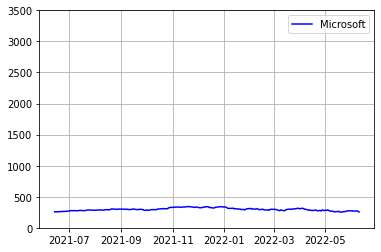

In [ ]:
plt.plot(msft_Data['Adj Close'],label='Microsoft',color='b')
plt.legend()
plt.grid(True)
plt.ylim(0,3500)
plt.show()

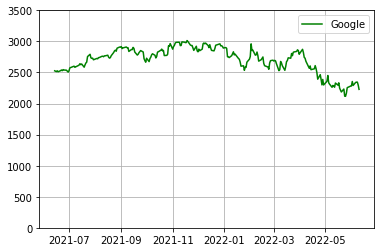

In [ ]:
plt.plot(goog_Data['Adj Close'],label="Google",color='g')
plt.legend()
plt.grid(True)
plt.ylim(0,3500)
plt.show()

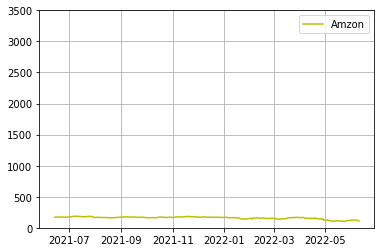

In [ ]:
plt.plot(amzn_Data['Adj Close'],label='Amzon',color='y')
plt.legend()
plt.grid(True)
plt.ylim(0,3500)
plt.show()

#What was the moving average of various stocks?


In [ ]:
appl_Data['MA for 20 days']=appl_Data['Adj Close'].rolling(20).mean()
appl_Data['MA for 50 days']=appl_Data['Adj Close'].rolling(50).mean()
appl_Data['MA for 100 days']=appl_Data['Adj Close'].rolling(100).mean()
appl_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,129.738754,Apple,NaN,NaN,NaN
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,128.903549,Apple,NaN,NaN,NaN
2021-06-16,130.889999,128.460007,130.369995,130.149994,91815000.0,129.410645,Apple,NaN,NaN,NaN
2021-06-17,132.550003,129.649994,129.800003,131.789993,96721700.0,131.041321,Apple,NaN,NaN,NaN
2021-06-18,131.509995,130.240005,130.710007,130.460007,108953300.0,129.718887,Apple,NaN,NaN,NaN


In [ ]:
msft_Data['MA for 20 days']=msft_Data['Adj Close'].rolling(20).mean()
msft_Data['MA for 50 days']=msft_Data['Adj Close'].rolling(50).mean()
msft_Data['MA for 100 days']=msft_Data['Adj Close'].rolling(100).mean()
msft_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2021-06-14,259.950012,256.799988,257.899994,259.890015,19150500.0,257.785065,Microsoft,NaN,NaN,NaN
2021-06-15,259.989990,257.679993,259.769989,258.359985,18038900.0,256.267456,Microsoft,NaN,NaN,NaN
2021-06-16,260.579987,254.419998,259.399994,257.380005,27220000.0,255.295364,Microsoft,NaN,NaN,NaN
2021-06-17,261.750000,256.010010,256.070007,260.899994,27565500.0,258.786835,Microsoft,NaN,NaN,NaN
2021-06-18,262.299988,258.750000,259.630005,259.429993,37202200.0,257.328796,Microsoft,NaN,NaN,NaN


In [ ]:
goog_Data['MA for 20 days']=goog_Data['Adj Close'].rolling(20).mean()
goog_Data['MA for 50 days']=goog_Data['Adj Close'].rolling(50).mean()
goog_Data['MA for 100 days']=goog_Data['Adj Close'].rolling(100).mean()
goog_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2021-06-14,2528.229980,2500.939941,2513.389893,2527.040039,1127500,2527.040039,Google,NaN,NaN,NaN
2021-06-15,2537.239990,2512.969971,2530.439941,2520.659912,1109100,2520.659912,Google,NaN,NaN,NaN
2021-06-16,2530.469971,2482.999023,2524.949951,2513.929932,1315800,2513.929932,Google,NaN,NaN,NaN
2021-06-17,2543.929932,2510.300049,2510.459961,2527.419922,1287800,2527.419922,Google,NaN,NaN,NaN
2021-06-18,2527.780029,2492.060059,2514.110107,2511.350098,2665300,2511.350098,Google,NaN,NaN,NaN


In [ ]:
amzn_Data['MA for 20 days']=amzn_Data['Adj Close'].rolling(20).mean()
amzn_Data['MA for 50 days']=amzn_Data['Adj Close'].rolling(50).mean()
amzn_Data['MA for 100 days']=amzn_Data['Adj Close'].rolling(100).mean()
amzn_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2021-06-14,169.250000,166.774994,167.341507,169.193497,51394000.0,169.193497,Amazon,NaN,NaN,NaN
2021-06-15,169.849503,168.155502,169.199997,169.156494,48524000.0,169.156494,Amazon,NaN,NaN,NaN
2021-06-16,171.317505,168.026505,169.600006,170.762497,84056000.0,170.762497,Amazon,NaN,NaN,NaN
2021-06-17,174.860001,170.050003,170.158997,174.462006,102730000.0,174.462006,Amazon,NaN,NaN,NaN
2021-06-18,175.350006,173.685501,173.999496,174.345001,104954000.0,174.345001,Amazon,NaN,NaN,NaN


In [ ]:
appl_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,129.738754,Apple,NaN,NaN,NaN
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,128.903549,Apple,NaN,NaN,NaN
2021-06-16,130.889999,128.460007,130.369995,130.149994,91815000.0,129.410645,Apple,NaN,NaN,NaN
2021-06-17,132.550003,129.649994,129.800003,131.789993,96721700.0,131.041321,Apple,NaN,NaN,NaN
2021-06-18,131.509995,130.240005,130.710007,130.460007,108953300.0,129.718887,Apple,NaN,NaN,NaN


In [ ]:
msft_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2021-06-14,259.950012,256.799988,257.899994,259.890015,19150500.0,257.785065,Microsoft,NaN,NaN,NaN
2021-06-15,259.989990,257.679993,259.769989,258.359985,18038900.0,256.267456,Microsoft,NaN,NaN,NaN
2021-06-16,260.579987,254.419998,259.399994,257.380005,27220000.0,255.295364,Microsoft,NaN,NaN,NaN
2021-06-17,261.750000,256.010010,256.070007,260.899994,27565500.0,258.786835,Microsoft,NaN,NaN,NaN
2021-06-18,262.299988,258.750000,259.630005,259.429993,37202200.0,257.328796,Microsoft,NaN,NaN,NaN


In [ ]:
amzn_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days
Date,,,,,,,,,,
2021-06-14,169.250000,166.774994,167.341507,169.193497,51394000.0,169.193497,Amazon,NaN,NaN,NaN
2021-06-15,169.849503,168.155502,169.199997,169.156494,48524000.0,169.156494,Amazon,NaN,NaN,NaN
2021-06-16,171.317505,168.026505,169.600006,170.762497,84056000.0,170.762497,Amazon,NaN,NaN,NaN
2021-06-17,174.860001,170.050003,170.158997,174.462006,102730000.0,174.462006,Amazon,NaN,NaN,NaN
2021-06-18,175.350006,173.685501,173.999496,174.345001,104954000.0,174.345001,Amazon,NaN,NaN,NaN


#What was the daily return average of a stock?


In [ ]:
appl_Data['Daily Return'] = appl_Data['Adj Close'].pct_change()
msft_Data['Daily Return'] = msft_Data['Adj Close'].pct_change()
goog_Data['Daily Return'] = goog_Data['Adj Close'].pct_change()
amzn_Data['Daily Return'] = amzn_Data['Adj Close'].pct_change()

In [ ]:
appl_Data.head()


,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,129.738754,Apple,NaN,NaN,NaN,NaN
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,128.903549,Apple,NaN,NaN,NaN,-0.006438
2021-06-16,130.889999,128.460007,130.369995,130.149994,91815000.0,129.410645,Apple,NaN,NaN,NaN,0.003934
2021-06-17,132.550003,129.649994,129.800003,131.789993,96721700.0,131.041321,Apple,NaN,NaN,NaN,0.012601
2021-06-18,131.509995,130.240005,130.710007,130.460007,108953300.0,129.718887,Apple,NaN,NaN,NaN,-0.010092


In [ ]:
amzn_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2021-06-14,169.250000,166.774994,167.341507,169.193497,51394000.0,169.193497,Amazon,NaN,NaN,NaN,NaN
2021-06-15,169.849503,168.155502,169.199997,169.156494,48524000.0,169.156494,Amazon,NaN,NaN,NaN,-0.000219
2021-06-16,171.317505,168.026505,169.600006,170.762497,84056000.0,170.762497,Amazon,NaN,NaN,NaN,0.009494
2021-06-17,174.860001,170.050003,170.158997,174.462006,102730000.0,174.462006,Amazon,NaN,NaN,NaN,0.021665
2021-06-18,175.350006,173.685501,173.999496,174.345001,104954000.0,174.345001,Amazon,NaN,NaN,NaN,-0.000671


#Add a new column ‘Trend’ whose values are based on the 'Daily Return'

In [ ]:
def trend(x):
  if x > -0.015 and x <= 0.015:
    return 'Slight or No change'
  elif x > 0.015 and x <= 0.04:
    return 'Slight Positive'
  elif x < -0.015 and x >= -0.4:
    return 'Slight Negative'
  elif x > 0.04 and x <= 0.06:
    return 'Positive'
  elif x < -0.04 and x >= -0.06:
    return 'Negative'
  elif x > 0.06 and x <= 0.07:
    return 'Among top gainers'
  elif x < -0.06 and x >= -0.07:
    return 'Among top losers'
  elif x > 0.07:
    return 'Bull run'
  elif x <= -0.07:
    return 'Bear drop'

In [ ]:
appl_Data['Trend']=appl_Data['Daily Return'].apply(lambda x:trend(x))
msft_Data['Trend']=msft_Data['Daily Return'].apply(lambda x:trend(x))
goog_Data['Trend']=goog_Data['Daily Return'].apply(lambda x:trend(x))
amzn_Data['Trend']=amzn_Data['Daily Return'].apply(lambda x:trend(x))

In [ ]:
appl_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return,Trend
Date,,,,,,,,,,,,
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,129.738754,Apple,NaN,NaN,NaN,NaN,None
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,128.903549,Apple,NaN,NaN,NaN,-0.006438,Slight or No change
2021-06-16,130.889999,128.460007,130.369995,130.149994,91815000.0,129.410645,Apple,NaN,NaN,NaN,0.003934,Slight or No change
2021-06-17,132.550003,129.649994,129.800003,131.789993,96721700.0,131.041321,Apple,NaN,NaN,NaN,0.012601,Slight or No change
2021-06-18,131.509995,130.240005,130.710007,130.460007,108953300.0,129.718887,Apple,NaN,NaN,NaN,-0.010092,Slight or No change


In [ ]:
amzn_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return,Trend
Date,,,,,,,,,,,,
2021-06-14,169.250000,166.774994,167.341507,169.193497,51394000.0,169.193497,Amazon,NaN,NaN,NaN,NaN,None
2021-06-15,169.849503,168.155502,169.199997,169.156494,48524000.0,169.156494,Amazon,NaN,NaN,NaN,-0.000219,Slight or No change
2021-06-16,171.317505,168.026505,169.600006,170.762497,84056000.0,170.762497,Amazon,NaN,NaN,NaN,0.009494,Slight or No change
2021-06-17,174.860001,170.050003,170.158997,174.462006,102730000.0,174.462006,Amazon,NaN,NaN,NaN,0.021665,Slight Positive
2021-06-18,175.350006,173.685501,173.999496,174.345001,104954000.0,174.345001,Amazon,NaN,NaN,NaN,-0.000671,Slight or No change


In [ ]:
appl_Data=appl_Data[appl_Data["Trend"].isnull()==False]
msft_Data=msft_Data[msft_Data["Trend"].isnull()==False]
goog_Data=goog_Data[goog_Data["Trend"].isnull()==False]
amzn_Data=amzn_Data[amzn_Data["Trend"].isnull()==False]

In [ ]:
appl_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return,Trend
Date,,,,,,,,,,,,
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,128.903549,Apple,NaN,NaN,NaN,-0.006438,Slight or No change
2021-06-16,130.889999,128.460007,130.369995,130.149994,91815000.0,129.410645,Apple,NaN,NaN,NaN,0.003934,Slight or No change
2021-06-17,132.550003,129.649994,129.800003,131.789993,96721700.0,131.041321,Apple,NaN,NaN,NaN,0.012601,Slight or No change
2021-06-18,131.509995,130.240005,130.710007,130.460007,108953300.0,129.718887,Apple,NaN,NaN,NaN,-0.010092,Slight or No change
2021-06-21,132.410004,129.210007,130.300003,132.300003,79663300.0,131.548447,Apple,NaN,NaN,NaN,0.014104,Slight or No change


In [ ]:
amzn_Data.head()

,High,Low,Open,Close,Volume,Adj Close,Company,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return,Trend
Date,,,,,,,,,,,,
2021-06-15,169.849503,168.155502,169.199997,169.156494,48524000.0,169.156494,Amazon,NaN,NaN,NaN,-0.000219,Slight or No change
2021-06-16,171.317505,168.026505,169.600006,170.762497,84056000.0,170.762497,Amazon,NaN,NaN,NaN,0.009494,Slight or No change
2021-06-17,174.860001,170.050003,170.158997,174.462006,102730000.0,174.462006,Amazon,NaN,NaN,NaN,0.021665,Slight Positive
2021-06-18,175.350006,173.685501,173.999496,174.345001,104954000.0,174.345001,Amazon,NaN,NaN,NaN,-0.000671,Slight or No change
2021-06-21,174.100006,171.699997,173.820999,172.697998,65542000.0,172.697998,Amazon,NaN,NaN,NaN,-0.009447,Slight or No change


#Visualize trend frequency through a Pie Chart.

In [ ]:
appl_frame=pd.DataFrame(appl_Data.groupby('Trend')['Adj Close'].mean())
appl_frame

,Adj Close
Trend,
Among top gainers,169.863693
Positive,155.481586
Slight Negative,156.845609
Slight Positive,161.380113
Slight or No change,153.490029


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


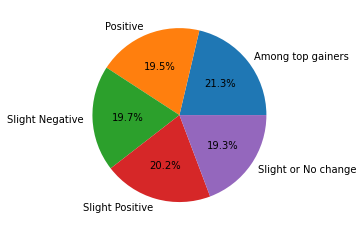

In [ ]:
plt.pie(appl_frame.values,labels=appl_frame.index,autopct="%1.1f%%")
plt.show()

In [ ]:
msft_frame=pd.DataFrame(msft_Data.groupby('Trend')['Adj Close'].mean())
msft_frame

,Adj Close
Trend,
Positive,296.365799
Slight Negative,290.941759
Slight Positive,300.046356
Slight or No change,296.679454


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


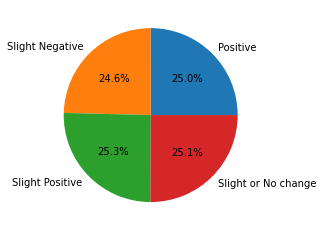

In [ ]:
plt.pie(msft_frame.values,labels=msft_frame.index,autopct="%1.1f%%")
plt.show()

In [ ]:
goog_frame=pd.DataFrame(goog_Data.groupby('Trend')['Adj Close'].mean())
goog_frame

,Adj Close
Trend,
Bull run,2960.729980
Positive,2620.616699
Slight Negative,2623.453484
Slight Positive,2658.113620
Slight or No change,2734.070311


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


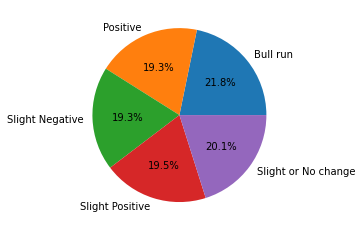

In [ ]:
plt.pie(goog_frame.values,labels=goog_frame.index,autopct="%1.1f%%")
plt.show()

In [ ]:
amzn_frame=pd.DataFrame(amzn_Data.groupby('Trend')['Adj Close'].mean())
amzn_frame

,Adj Close
Trend,
Bull run,157.639496
Positive,141.230278
Slight Negative,151.124000
Slight Positive,159.512115
Slight or No change,163.645456


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


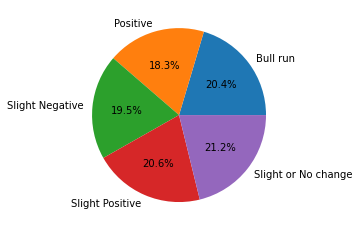

In [ ]:
plt.pie(amzn_frame.values,labels=amzn_frame.index,autopct="%1.1f%%")
plt.show()

#What was the correlation between the daily returns of different stocks?

In [ ]:
x=appl_Data['Daily Return']
y=msft_Data['Daily Return']
z=goog_Data['Daily Return']
w=amzn_Data['Daily Return']
df1={'AAPL':x,'MSFT':y,'GOOG':z,'AMZN':w}
result=pd.DataFrame(df1)
result


,AAPL,MSFT,GOOG,AMZN
Date,,,,
2021-06-15,-0.006438,-0.005887,-0.002525,-0.000219
2021-06-16,0.003934,-0.003793,-0.002670,0.009494
2021-06-17,0.012601,0.013676,0.005366,0.021665
2021-06-18,-0.010092,-0.005634,-0.006358,-0.000671
2021-06-21,0.014104,0.012335,0.007068,-0.009447
...,...,...,...,...
2022-06-06,0.005228,-0.004703,0.021355,0.019943
2022-06-07,0.017586,0.013953,0.001872,-0.014344
2022-06-08,-0.005043,-0.007670,0.000072,-0.014797


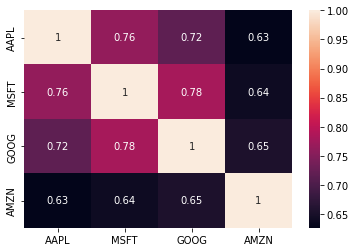

In [ ]:
sns.heatmap(result.corr(),annot=True)